## Import packages

In [42]:
import os
import warnings

import librosa
import numpy as np
import scipy.io.wavfile
from tqdm import tqdm_notebook

from preprocess_utils import get_max_duration, pad_input, pipeline

warnings.filterwarnings('ignore')

## Obtain file paths of AudioMNIST wav files

In [43]:
audio_dir = './audio_samples'

In [44]:
male_wav_fpaths = [f'{audio_dir}/male/{f}' for f in os.listdir(audio_dir + '/male')]
female_wav_fpaths = [f'{audio_dir}/female/{f}' for f in os.listdir(audio_dir + '/female')]

In [45]:
# Ensure same order across runs
np.random.seed(13)
np.random.shuffle(male_wav_fpaths)
np.random.shuffle(female_wav_fpaths)

In [46]:
wav_fpaths = male_wav_fpaths + female_wav_fpaths

In [47]:
print(wav_fpaths[0:9])

['./audio_samples/male/daniel-de-5.wav', './audio_samples/male/mike-en-7.wav', './audio_samples/male/martin-en-6.wav', './audio_samples/male/mike-de-8.wav', './audio_samples/male/mike-en-4.wav', './audio_samples/male/mike-de-3.wav', './audio_samples/male/daniel-en-5.wav', './audio_samples/male/daniel-de-1.wav', './audio_samples/male/daniel-de-2.wav']


### Obtain max length

In [48]:
sample_rate = librosa.core.get_samplerate(wav_fpaths[0])
print(sample_rate)

44100


In [49]:
# max_duration = get_max_duration(wav_fpaths) # this takes a while to run as processes 30k audio files
max_duration = 0.9999583333333333
print(max_duration)

0.9999583333333333


In [50]:
max_samples = int(max_duration * sample_rate)
print(max_samples)

44098


## Output MFC JPEGs

In [59]:
mfc_dataset_dir = 'mfc_dataset_train_test'

  0%|          | 0/60 [00:00<?, ?it/s]

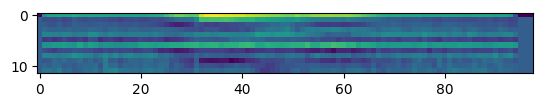

In [60]:
import matplotlib.pyplot as plt

np.random.seed(1)
for i, fp in tqdm_notebook(enumerate(male_wav_fpaths), total=len(male_wav_fpaths)):
    _, fn = os.path.split(fp)
    if not fn.endswith('wav'):
        continue
    _, input = scipy.io.wavfile.read(fp)
    input = pad_input(input, target_len=max_samples)
    mfc = pipeline(sample_rate, input)
    if i == 0:
        plt.imshow(mfc)
    plt.imsave(f'{mfc_dataset_dir}/test/male/{fn.replace("wav", "jpg")}', mfc)

  0%|          | 0/81 [00:00<?, ?it/s]

Processing lele-pt-4.wav
Processing lele-pt-0.wav
Processing sandra-en-0.wav
Processing sandra-de-0.wav
Processing kika-en-3.wav
Processing kika-pt-6.wav
Processing lele-en-3.wav
Processing sandra-de-6.wav
Processing lele-de-7.wav
Processing lele-pt-5.wav
Processing lele-de-3.wav
Processing kika-en-5.wav
Processing lele-pt-8.wav
Processing lele-de-6.wav
Processing sandra-en-3.wav
Processing sandra-de-2.wav
Processing kika-pt-9.wav
Processing kika-pt-1.wav
Processing sandra-de-5.wav
Processing sandra-de-4.wav
Processing sandra-de-3.wav
Processing sandra-it-1.wav
Processing lele-pt-2.wav
Processing sandra-en-7.wav
Processing kika-en-1.wav
Processing kika-pt-2.wav
Processing lele-en-1.wav
Processing lele-pt-3.wav
Processing sandra-en-6.wav
Processing sandra-it-9.wav
Processing kika-en-6.wav
Processing lele-de-0.wav
Processing kika-pt-8.wav
Processing lele-de-1.wav
Processing kika-en-8.wav
Processing sandra-en-4.wav
Processing sandra-en-8.wav
Processing kika-en-4.wav
Processing lele-pt-6.w

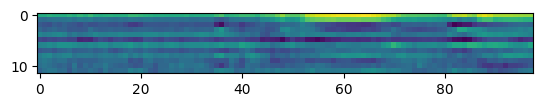

In [61]:
np.random.seed(2)
for i, fp in tqdm_notebook(enumerate(female_wav_fpaths), total=len(female_wav_fpaths)):
    _, fn = os.path.split(fp)
    if not fn.endswith('wav'):
        continue
    _, input = scipy.io.wavfile.read(fp)  # faster than librosa
    input = pad_input(input, target_len=max_samples)
    mfc = pipeline(sample_rate, input)
    if i == 0:
        plt.imshow(mfc)
    plt.imsave(f'{mfc_dataset_dir}/test/female/{fn.replace("wav", "jpg")}', mfc)